# Random walk with variable stepcount
What happens in the 1-D random walk if the stepsize is also random? Model this situation where instead of randomizing the direction of each step, you pick a step with a random length on the range $ [-1, 1] $. What is the time dependence of the RMS displacement in this case?

# Defining the parameters

### Importing the necessary libraries

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from random import seed

In [2]:
dims = 1 # dimensions
n_steps = 1000 #number of steps
seed(1)
step_choice = [] # 
for i in range(n_steps):
    step_choice.append(random.uniform(-1, 1)) # Creating the choices of steps 
    
origin = np.zeros((1,dims)) # Setting the origin 

# Simulating the 1D Random Walk

In [3]:
step_shape = (n_steps,dims) # one-dimension
steps = np.random.choice(a = step_choice, size = step_shape) # choosing the steps
path = np.concatenate([origin, steps]).cumsum(0) 
start = path[:1] 
stop = path[-1:]

# Plotting the 1D Random Walk with Variable Step Count

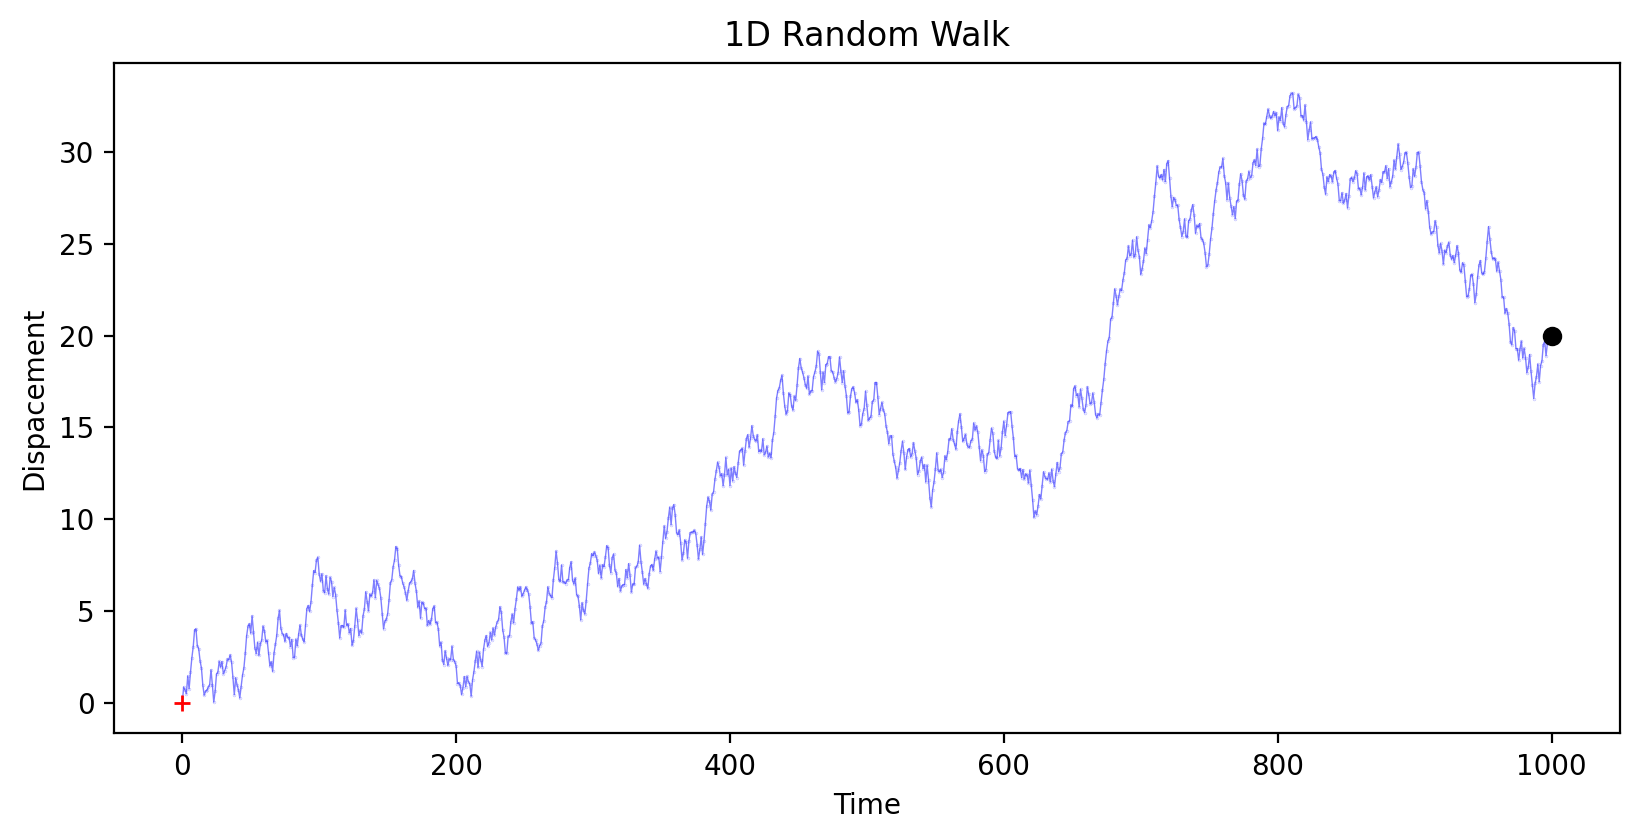

In [4]:
fig = plt.figure(figsize=(8,4),dpi=200)
ax = fig.add_subplot(111)
ax.scatter(np.arange(n_steps+1), path, c='blue',alpha=0.25,s=0.05);
ax.plot(path,c='blue', alpha=0.5,lw=0.5,ls='-');
ax.plot(0, start, c='red', marker='+')
ax.plot(n_steps, stop, c='black', marker='o')
ax.set_xlabel('Time')
ax.set_ylabel('Dispacement')
plt.title('1D Random Walk')
plt.tight_layout(pad=0)

# Determining the time dependence of the RMS displacement in this case 


In [5]:
steps = 200
boys = 2000
x = np.zeros(steps)
x_sum = np.zeros([steps])
x2_sum = np.zeros([steps])

In [6]:
for j in range(boys):
    for i in range(1,steps):
        x[i] = x[i-1] + random.uniform(-1,1)
    
    for i in range(steps):
        x_sum[i] = x_sum[i] + x[i]
        x2_sum[i] = x2_sum[i] + x[i]**2

#RMS displacement
x_ave = [i / boys for i in x_sum]
RMS = [np.sqrt(i/boys) for i in x2_sum]

#calculating the sqrt of n
ranges = []
for i in range(steps):
    ranges.append(np.sqrt(i))

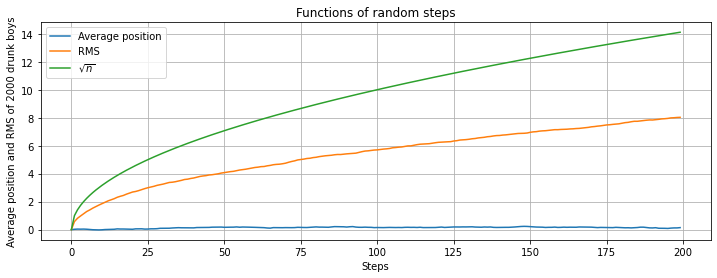

In [7]:
plt.figure(figsize=(12,4))
plt.plot(x_ave, label='Average position')
plt.plot(RMS, label='RMS')
plt.plot(ranges, label = '$\sqrt{n}$')
plt.title('Functions of random steps')
plt.xlabel('Steps')
plt.ylabel(f'Average position and RMS of {boys} drunk boys')
plt.grid(True)
plt.legend(loc='best')
plt.show()

# Conclusion
#### The time dependence of the RMS displacement in this case is simply the same as the graph produced when the stepsize was not random.